In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, t, f
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import pearsonr, t as t_dist
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

## Задание №1. Проведите корреляционный анализ данных из файла 'ex1.csv' по Пирсону

In [3]:
# считывание файла
df1 = pd.read_csv('ex1.csv') 

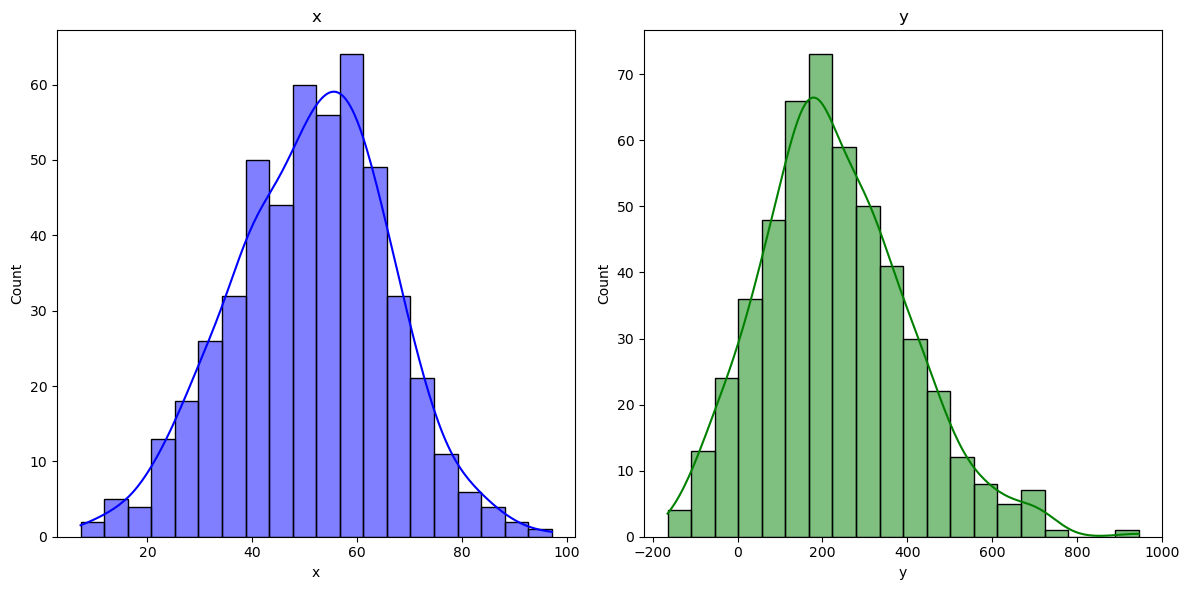

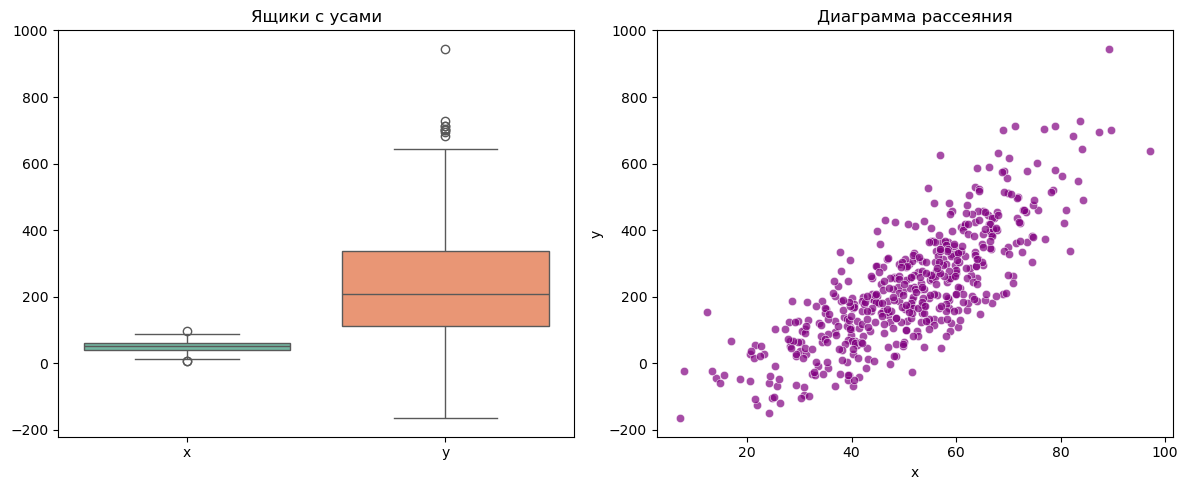


Результаты корреляционного анализа:
Коэффициент корреляции Пирсона: 0.803
P-значение: 3.974e-114

Корреляция сильная.


In [4]:
def analyze_data(data):
    """Загружает данные, проверяет их на числовые типы, строит графики и вычисляет корреляцию Пирсона."""
    try:
        # Проверка числовых типов
        if not data.select_dtypes(include=['float64', 'int64']).equals(data):
            raise ValueError("Данные содержат нечисловые столбцы.")

        # Визуализация
        plt.figure(figsize=(12, 6))

        # Гистограммы
        plt.subplot(1, 2, 1)
        sns.histplot(data['x'], kde=True, bins=20, color='blue')
        plt.title('x')
        plt.subplot(1, 2, 2)
        sns.histplot(data['y'], kde=True, bins=20, color='green')
        plt.title('y')
        plt.tight_layout()
        plt.show()

        # Ящик с усами и диаграмма рассеяния на одной строке
        plt.figure(figsize=(12, 5))  # Изменено: размер фигуры

        plt.subplot(1, 2, 1)
        sns.boxplot(data=data, orient="v", palette="Set2")
        plt.title('Ящики с усами')

        plt.subplot(1, 2, 2)
        sns.scatterplot(x=data['x'], y=data['y'], alpha=0.7, color='purple')
        plt.title('Диаграмма рассеяния')

        plt.tight_layout()
        plt.show()

        # Корреляция Пирсона
        corr_analysis(data)

    except FileNotFoundError:
        print(f"Ошибка: файл {file_path} не найден.")
    except ValueError as e:
        print(f"Ошибка: {e}")
def corr_analysis(data):
    corr_coeff, p_value = pearsonr(data['x'], data['y'])
    print("\nРезультаты корреляционного анализа:")
    print(f"Коэффициент корреляции Пирсона: {corr_coeff:.3f}")
    print(f"P-значение: {p_value:.3e}")
    if abs(corr_coeff) > 0.7:
        print("\nКорреляция сильная.")
    else:
        print("\nКорреляция слабая.")

# Запуск анализа
analyze_data(df1)

**Вывод:**

Корреляционный анализ, проведенный с использованием коэффициента корреляции Пирсона, выявил сильную положительную линейную связь между анализируемыми переменными. Значение коэффициента корреляции Пирсона равно 0.803, что указывает на высокую степень взаимосвязи. Крайне низкое p-значение (3.974e-114) свидетельствует о статистической значимости этой связи.  Анализ гистограмм показал, что распределения обеих переменных близки к нормальному.  На ящике с усами наблюдаются не значительные выбросы. Диаграмма рассеяния продемонстрировала линейную зависимость. Таким образом, предпосылки для применения коэффициента корреляции Пирсона выполнены, и полученные результаты являются надежными.  Использование коэффициента корреляции Пирсона в данном случае оправдано, и полученные результаты позволяют сделать вывод о наличии сильной линейной зависимости между переменными.


In [6]:
# Вычисление коэффициента корреляции Пирсона и p-значения
correlation_coefficient, p_val = pearsonr(df1['x'], df1['y'])

# Определение количества наблюдений
num_observations = len(df1)

# Вычисление t-статистики
t_statistic = correlation_coefficient * ((num_observations - 2) ** 0.5) / ((1 - correlation_coefficient ** 2) ** 0.5)

# Получение критического значения t для двустороннего теста при уровне значимости 0.05
alpha_level = 0.05
t_critical_value = t_dist.ppf(1 - alpha_level / 2, df=num_observations - 2)

# Печать результатов анализа
print("Результаты анализа:")
print(f"Коэффициент корреляции Пирсона: {correlation_coefficient:.3f}")
print(f"P-значение: {p_val:.3e}")
print(f"t-статистика: {t_statistic:.3f}")
print(f"Критическое значение t (при α = 0.05): ±{t_critical_value:.3f}")

# Оценка значимости связи
if abs(t_statistic) > t_critical_value:
    print("\nСвязь статистически значима. Корреляция между переменными значительна.")
else:
    print("\n⚠Связь не является статистически значимой. Корреляция между переменными слабая или отсутствует.")

# Оценка силы корреляции
if abs(correlation_coefficient) > 0.7:
    print("Корреляция сильная.")
elif abs(correlation_coefficient) > 0.3:
    print("Корреляция умеренная.")
else:
    print("Корреляция слабая.")


Результаты анализа:
Коэффициент корреляции Пирсона: 0.803
P-значение: 3.974e-114
t-статистика: 30.092
Критическое значение t (при α = 0.05): ±1.965

Связь статистически значима. Корреляция между переменными значительна.
Корреляция сильная.


**Вывод:**

Корреляционный анализ выявил сильную связь (r = 0.803) между анализируемыми переменными. Эта связь является статистически значимой (p < 0.001), что указывает на высокую степень взаимосвязи. Значение p-значения значительно ниже стандартного уровня значимости (обычно 0.05), что позволяет отвергнуть нулевую гипотезу об отсутствии корреляции. Таким образом, результаты анализа подтверждают наличие значимой связи между переменными.

## Задание №2. Проведите корреляционный анализ данных из файла 'ex2.csv' по Спирмену

In [9]:
# считывание файла
df2 = pd.read_csv('ex2.csv') 

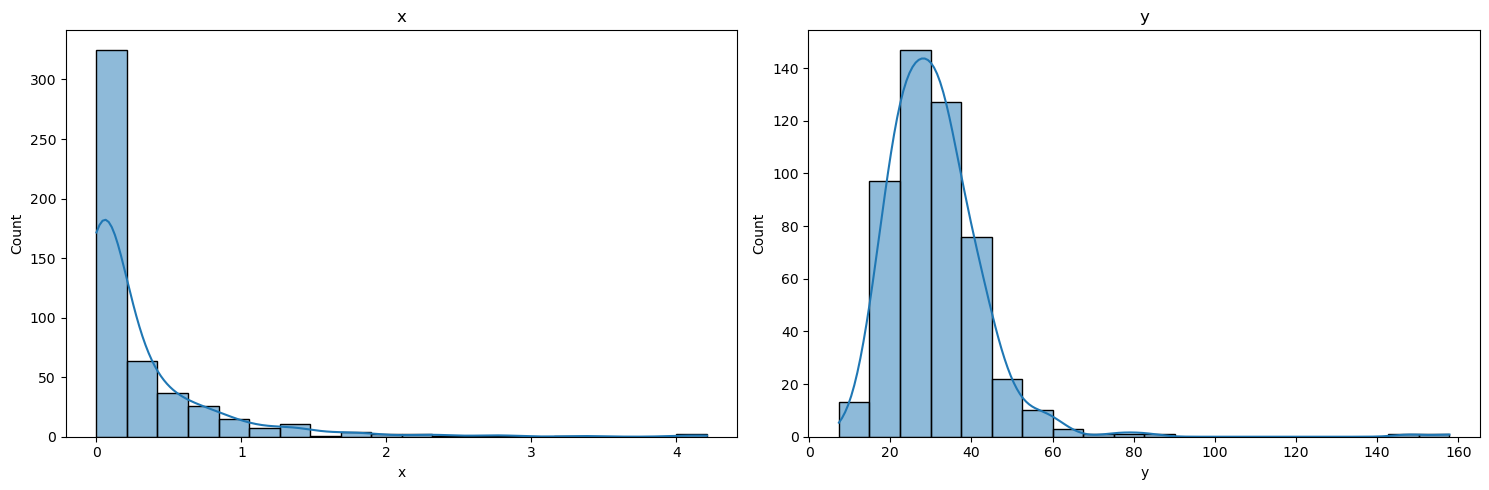

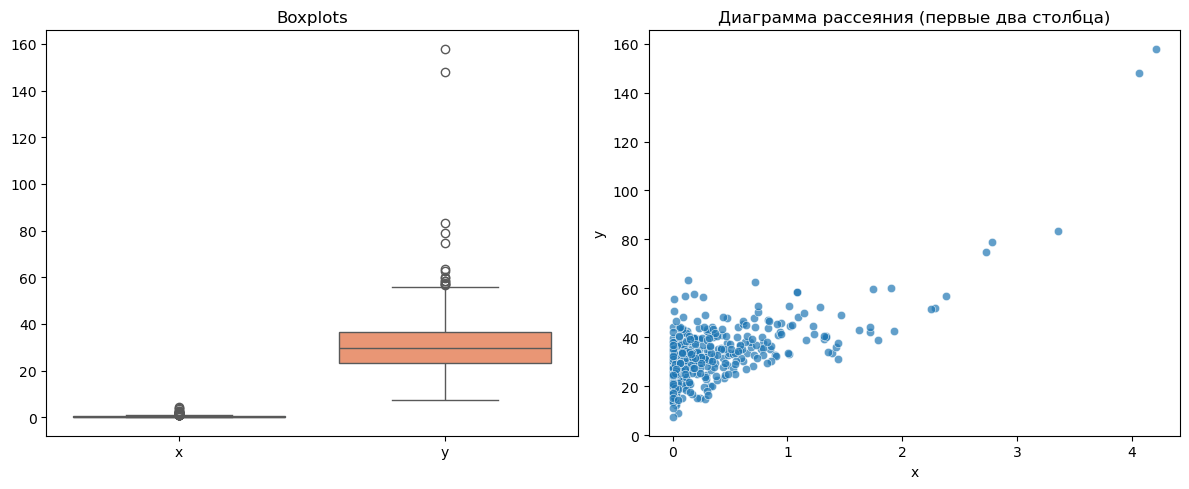

<Figure size 1000x800 with 0 Axes>

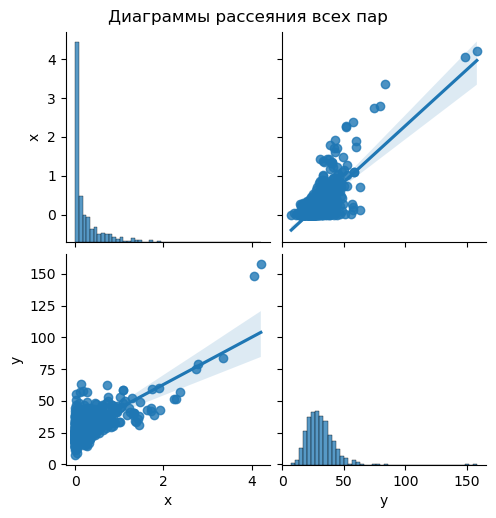


Корреляционная матрица (Спирмен):
           x         y
x  1.000000  0.617087
y  0.617087  1.000000

Корреляция Спирмена между x и y:
Коэффициент корреляции: 0.617
P-значение: 8.472e-54
Корреляция умеренная


In [10]:
def analyze_data(data):
    """
    Анализирует данные: проверяет числовые типы, строит графики и вычисляет корреляцию Спирмена.
    """
    try:
        # Проверка числовых типов
        numeric_data = data.select_dtypes(include=['number'])
        if numeric_data.empty:
            raise ValueError("DataFrame не содержит числовых столбцов.")
        if not numeric_data.equals(data):
            print("Внимание: DataFrame содержит нечисловые столбцы. Анализ будет проведен только для числовых.")

        num_cols = len(numeric_data.columns)
        if num_cols == 1:
            print("Для построения графиков требуется хотя бы два числовых столбца.")
            return

        # Гистограммы
        plt.figure(figsize=(15, 5))  
        for i, col in enumerate(numeric_data.columns):
            plt.subplot(1, num_cols, i+1)
            sns.histplot(numeric_data[col], kde=True, bins=20)
            plt.title(col)
        plt.tight_layout()
        plt.show()

        # Boxplot и диаграмма рассеяния на одной строке
        if num_cols >= 2:
            plt.figure(figsize=(12, 5))

            plt.subplot(1, 2, 1)
            sns.boxplot(data=numeric_data, orient="v", palette="Set2")
            plt.title('Boxplots')

            plt.subplot(1, 2, 2)
            sns.scatterplot(x=numeric_data.columns[0], y=numeric_data.columns[1], data=numeric_data, alpha=0.7)
            plt.title('Диаграмма рассеяния (первые два столбца)')

            plt.tight_layout()
            plt.show()
        else:
            print("Для построения диаграммы рассеяния необходимо два или более столбцов")

        # Для более полного анализа,  можно использовать pairplot для всех пар столбцов
        if num_cols >=2:
            plt.figure(figsize=(10, 8))
            sns.pairplot(numeric_data, kind="reg")
            plt.suptitle("Диаграммы рассеяния всех пар", y=1.02)
            plt.show()


        # Корреляция Спирмена
        corr_matrix = numeric_data.corr(method='spearman')
        print("\nКорреляционная матрица (Спирмен):\n", corr_matrix)

        for i in range(num_cols):
            for j in range(i + 1, num_cols):  # Избегаем дублирования и диагонали
                col1 = numeric_data.columns[i]
                col2 = numeric_data.columns[j]
                corr_coeff, p_value = spearmanr(numeric_data[col1], numeric_data[col2])
                print(f"\nКорреляция Спирмена между {col1} и {col2}:")
                print(f"Коэффициент корреляции: {corr_coeff:.3f}")
                print(f"P-значение: {p_value:.3e}")
                if abs(corr_coeff) > 0.7:
                    print("Корреляция сильная.")
                elif abs(corr_coeff) > 0.3:
                    print("Корреляция умеренная")                
                else:
                    print("Корреляция слабая.")


    except ValueError as e:
        print(f"Ошибка: {e}")
    except Exception as e:
        print(f"Произошла непредвиденная ошибка: {e}")



analyze_data(df2)

**Вывод:**

Анализ корреляции между переменными x и y был проведен с использованием коэффициента корреляции Спирмена, который показал умеренную положительную связь (r<sub>s</sub> = 0.617, p < 0.001).  Выбор метода Спирмена был предпочтительнее, чем метод Пирсона, при условии, что предшествующие графики (гистограммы и диаграммы рассеяния) показали отклонение от нормального распределения данных  или наличие существенных выбросов.  Метод Спирмена, в отличие от метода Пирсона, не предполагает нормальное распределение и более устойчив к влиянию выбросов.

Если гистограммы для x и y демонстрировали значительное отклонение от нормального распределения (например, скошенность, многомодальность), или диаграмма рассеяния показывала нелинейную зависимость между переменными, или присутствовали значительные выбросы,  то использование непараметрического метода Спирмена было оправданным выбором для получения надежной оценки корреляции.  В противном случае, если бы данные были близки к нормальному распределению и без выраженных выбросов, то использование корреляции Пирсона было бы более предпочтительным.

In [12]:
# Вычисление коэффициента корреляции Пирсона
corr_coeff, p_value = pearsonr(df2['x'], df2['y'])

# Определение количества наблюдений
n = len(df2)

# Расчет t-статистики
t_stat = corr_coeff * ((n - 2) ** 0.5) / ((1 - corr_coeff**2) ** 0.5)

# Определение критического значения t для двустороннего теста на уровне значимости 0.05
alpha = 0.05
t_critical = t.ppf(1 - alpha / 2, df=n - 2)

# Печать результатов
print("Результаты анализа:")
print(f"Коэффициент корреляции Пирсона: {corr_coeff:.3f}")
print(f"P-значение: {p_value:.3e}")
print(f"t-статистика: {t_stat:.3f}")
print(f"Критическое значение t (при α = 0.05): ±{t_critical:.3f}")

# Оценка значимости
if abs(t_stat) > t_critical:
    print("\nСвязь статистически значима. Корреляция между величинами значительна.")
else:
    print("\nСвязь не статистически значима. Корреляция между величинами слабая или отсутствует.")

# Оценка степени корреляции
if abs(corr_coeff) > 0.7:
    print("Корреляция сильная.")
elif abs(corr_coeff) > 0.3:
    print("Корреляция умеренная.")
else:
    print("Корреляция слабая.")

Результаты анализа:
Коэффициент корреляции Пирсона: 0.733
P-значение: 1.711e-85
t-статистика: 24.071
Критическое значение t (при α = 0.05): ±1.965

Связь статистически значима. Корреляция между величинами значительна.
Корреляция сильная.


**Вывод:**

Между анализируемыми переменными существует статистически значимая сильная положительная корреляционная зависимость. Коэффициент корреляции Пирсона (0.733) указывает на наличие связи высокой силы, что означает, что более высокие значения одной переменной, как правило, сопровождаются более высокими значениями другой. Статистическая значимость подтверждается как низким p-значением, полученным из расчета корреляции Пирсона (p < 0.001), так и низким p-значением t-критерия (p < 0.001), что подтверждает достоверность коэффициента корреляции. Высокое значение t-статистики (24.071) дополнительно подтверждает значимость полученной связи.

## Задание №3. Проведите линейный регрессионный анализ данных из файла 'ex3.csv'

In [15]:
# считывание файла
df3 = pd.read_csv('ex3.csv') 

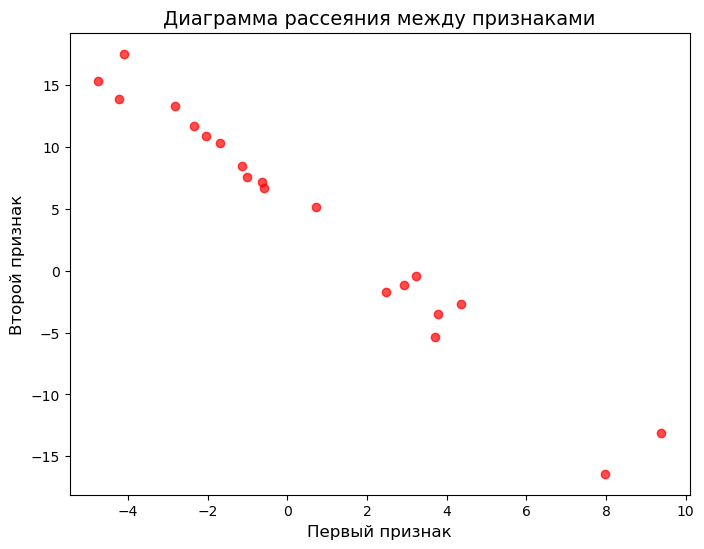


Обоснование:
Для использования корреляции Пирсона признаки должны быть числовыми и иметь линейную связь.
Все столбцы числовые. Можно использовать корреляцию Пирсона.

Результаты корреляционного анализа:
Коэффициент корреляции Пирсона: -0.985
P-значение: 3.176e-15


In [16]:
# Построение диаграммы рассеяния
plt.figure(figsize=(8, 6))
plt.scatter(df3.iloc[:, 0], df3.iloc[:, 1], alpha=0.7, color='red')
plt.title('Диаграмма рассеяния между признаками', fontsize=14)
plt.xlabel('Первый признак', fontsize=12)
plt.ylabel('Второй признак', fontsize=12)
plt.show()

# Вывод о целесообразности использования корреляции Пирсона
print("\nОбоснование:")
print("Для использования корреляции Пирсона признаки должны быть числовыми и иметь линейную связь.")

# Проверка: все ли данные числовые
if df3.select_dtypes(include=['float64', 'int64']).equals(df3):
    print("Все столбцы числовые. Можно использовать корреляцию Пирсона.")
else:
    print("Данные содержат нечисловые столбцы. Проверьте данные перед анализом.")
    raise ValueError("Данные содержат нечисловые столбцы.")

# Расчет коэффициента корреляции Пирсона
pearson_corr, p_value = pearsonr(df3.iloc[:, 0], df3.iloc[:, 1])

# Вывод результатов
print("\nРезультаты корреляционного анализа:")
print(f"Коэффициент корреляции Пирсона: {pearson_corr:.3f}")
print(f"P-значение: {p_value:.3e}")

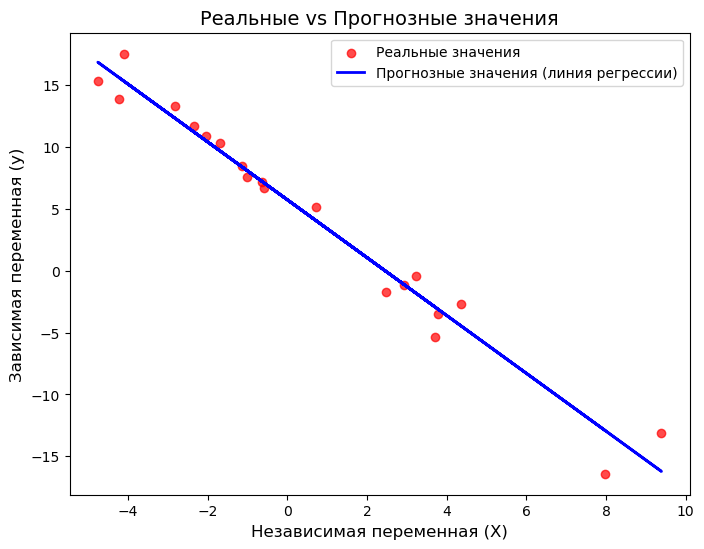


Коэффициенты линейной регрессии:

Свободный член (b0): 5.741

Коэффициент наклона (b1): -2.339


In [17]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = df3.iloc[:, 0].values.reshape(-1, 1) 
y = df3.iloc[:, 1].values

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X, y)

# Прогнозирование на основе модели
y_pred = model.predict(X)

# Расчет коэффициентов линейной регрессии
intercept = model.intercept_  
slope = model.coef_[0]     

# Построение диаграммы рассеяния реальных и прогнозных значений
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.7, label="Реальные значения", color='red')
plt.plot(X, y_pred, color='blue', linewidth=2, label="Прогнозные значения (линия регрессии)")
plt.title('Реальные vs Прогнозные значения', fontsize=14)
plt.xlabel('Независимая переменная (X)', fontsize=12)
plt.ylabel('Зависимая переменная (y)', fontsize=12)
plt.legend()
plt.show()

print("\nКоэффициенты линейной регрессии:")
print(f"\nСвободный член (b0): {intercept:.3f}")
print(f"\nКоэффициент наклона (b1): {slope:.3f}")

In [18]:

def mean_approximation_error(y_true, y_pred):
    """
    Рассчитывает среднюю ошибку аппроксимации.
    Args:
        y_true (array-like): Реальные значения.
        y_pred (array-like): Прогнозные значения.
    Returns:
        float: Средняя ошибка аппроксимации в процентах.
    """
    try:
        error = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
        print(f"Средняя ошибка аппроксимации: {error:.2f}%")
        return error
    except (ZeroDivisionError, TypeError, ValueError) as e:  
        print(f"Ошибка! {e}")
        return None

# Расчет средней ошибки аппроксимации
approximation_error = mean_approximation_error(y, y_pred)

Средняя ошибка аппроксимации: 35.26%


In [19]:
# Функция для вычисления F-статистики
def compute_f_statistic(actual_values, predicted_values, parameters_count):
    """
    Вычисляет F-статистику для модели регрессии.
    
    Args:
        actual_values (array-like): Фактические значения целевой переменной.
        predicted_values (array-like): Прогнозируемые значения.
        parameters_count (int): Количество параметров в модели (включая свободный член).
        
    Returns:
        float: Значение F-статистики.
    """
    sample_size = len(actual_values)  # Общее количество наблюдений
    residual_sum_of_squares = np.sum((actual_values - predicted_values) ** 2)  # Остаточная сумма квадратов
    total_sum_of_squares = np.sum((actual_values - np.mean(actual_values)) ** 2)  # Общая сумма квадратов
    explained_sum_of_squares = total_sum_of_squares - residual_sum_of_squares  # Объясненная сумма квадратов

    f_stat = (explained_sum_of_squares / (parameters_count - 1)) / (residual_sum_of_squares / (sample_size - parameters_count))
    return f_stat

params_count = 2

f_statistic_value = compute_f_statistic(y, y_pred, params_count)

print(f"F-статистика: {f_statistic_value:.3f}")

print("\nРезультаты:")
if f_statistic_value > 4:  # Условный порог для значимости
    print("Модель регрессии имеет статистическую значимость.")
else:
    print("Модель регрессии не имеет статистической значимости.")


F-статистика: 592.259

Результаты:
Модель регрессии имеет статистическую значимость.


In [20]:
def compute_standard_errors(X_matrix, actual_values, predicted_values):
    """
    Рассчитывает стандартные ошибки для коэффициентов регрессии.
    
    Args:
        X_matrix (array-like): Матрица независимых переменных (с добавленным столбцом единиц для свободного члена).
        actual_values (array-like): Фактические значения целевой переменной.
        predicted_values (array-like): Прогнозируемые значения.
        
    Returns:
        tuple: стандартные ошибки для свободного члена и наклонного коэффициента.
    """
    sample_size = len(actual_values)
    residual_sum_of_squares = np.sum((actual_values - predicted_values) ** 2)  # Остаточная сумма квадратов
    mean_squared_error = residual_sum_of_squares / (sample_size - 2)  # Среднеквадратичная ошибка (MSE)
    
    X_with_intercept = np.hstack([np.ones((X_matrix.shape[0], 1)), X_matrix])  # Добавление столбца для свободного члена
    inverse_XTX = np.linalg.inv(X_with_intercept.T @ X_with_intercept)  # Обратная матрица (X'X)^-1
    standard_errors = np.sqrt(np.diag(inverse_XTX * mean_squared_error))  # Стандартные ошибки
    
    return standard_errors

X_data_with_intercept = X  # Исходные данные
standard_errors = compute_standard_errors(X_data_with_intercept, y, y_pred)

t_stat_intercept = intercept / standard_errors[0]
t_stat_slope = slope / standard_errors[1]

corr_t_statistic = pearson_corr * ((len(y) - 2) ** 0.5) / ((1 - pearson_corr ** 2) ** 0.5)

alpha_level = 0.05
critical_t_value = t.ppf(1 - alpha_level / 2, df=len(y) - 2)

confidence_interval_intercept = (intercept - critical_t_value * standard_errors[0], intercept + critical_t_value * standard_errors[0])
confidence_interval_slope = (slope - critical_t_value * standard_errors[1], slope + critical_t_value * standard_errors[1])

print("Результаты анализа коэффициентов регрессии:")
print(f"Свободный член (b0): {intercept:.3f}")
print(f"Коэффициент наклона (b1): {slope:.3f}")
print(f"Стандартная ошибка свободного члена: {standard_errors[0]:.3f}")
print(f"Стандартная ошибка коэффициента наклона: {standard_errors[1]:.3f}")
print(f"t-статистика свободного члена: {t_stat_intercept:.3f}")
print(f"t-статистика коэффициента наклона: {t_stat_slope:.3f}")
print(f"Критическое значение t (при α = 0.05): ±{critical_t_value:.3f}")
print("\nДоверительные интервалы для коэффициентов регрессии (95%):")
print(f"Свободный член: {confidence_interval_intercept}")
print(f"Коэффициент наклона: {confidence_interval_slope}")
print("\nВывод о статистической значимости:")
if abs(t_stat_intercept) > critical_t_value:
    print("Свободный член (b0) статистически значим.")
else:
    print("Свободный член (b0) не статистически значим.")

if abs(t_stat_slope) > critical_t_value:
    print("Коэффициент наклона (b1) статистически значим.")
else:
    print("Коэффициент наклона (b1) не статистически значим.")

if abs(corr_t_statistic) > critical_t_value:
    print("Коэффициент корреляции статистически значим.")
else:
    print("Коэффициент корреляции не статистически значим.")

Результаты анализа коэффициентов регрессии:
Свободный член (b0): 5.741
Коэффициент наклона (b1): -2.339
Стандартная ошибка свободного члена: 0.376
Стандартная ошибка коэффициента наклона: 0.096
t-статистика свободного члена: 15.288
t-статистика коэффициента наклона: -24.336
Критическое значение t (при α = 0.05): ±2.101

Доверительные интервалы для коэффициентов регрессии (95%):
Свободный член: (4.951844435634772, 6.529680463057639)
Коэффициент наклона: (-2.5410697545475003, -2.137201727680769)

Вывод о статистической значимости:
Свободный член (b0) статистически значим.
Коэффициент наклона (b1) статистически значим.
Коэффициент корреляции статистически значим.


In [21]:
# Функция для расчета доверительного интервала предсказания
def calculate_prediction_interval(x_value, independent_vars, actual_values, predicted_values, model_intercept, model_slope, significance_level=0.05):
    """
    Вычисляет доверительный интервал для ожидаемого значения y при заданном x_value.
    
    Args:
        x_value (float): Значение независимой переменной (x), для которого нужно получить прогноз y.
        independent_vars (array-like): Независимые переменные.
        actual_values (array-like): Фактические значения зависимой переменной.
        predicted_values (array-like): Прогнозируемые значения.
        model_intercept (float): Свободный член модели.
        model_slope (float): Коэффициент наклона модели.
        significance_level (float): Уровень значимости для доверительного интервала.
        
    Returns:
        tuple: Прогнозное значение y и его доверительный интервал.
    """
    num_samples = len(actual_values)
    residual_sum_of_squares = np.sum((actual_values - predicted_values) ** 2)  # Остаточная сумма квадратов
    mean_squared_error = residual_sum_of_squares / (num_samples - 2)  # Среднеквадратичная ошибка

    # Среднее значение x
    x_average = np.mean(independent_vars)

    # Стандартная ошибка предсказания
    standard_error_prediction = np.sqrt(
        mean_squared_error * (1 + (1 / num_samples) + ((x_value - x_average) ** 2) / np.sum((independent_vars - x_average) ** 2))
    )

    # Критическое t-значение для заданного уровня значимости
    t_value_critical = t.ppf(1 - significance_level / 2, df=num_samples - 2)

    # Прогнозное значение y
    predicted_y_value = model_intercept + model_slope * x_value

    # Доверительный интервал
    lower_bound = predicted_y_value - t_value_critical * standard_error_prediction
    upper_bound = predicted_y_value + t_value_critical * standard_error_prediction

    return predicted_y_value, (lower_bound, upper_bound)

# Значение x_value для предсказания
x_value_for_prediction = 6

# Прогнозное значение и доверительный интервал
predicted_y, confidence_interval = calculate_prediction_interval(x_value_for_prediction, X.flatten(), y, y_pred, intercept, slope)

# Вывод результата
print("\nПредсказание для x_value = 6:")
print(f"\nПрогнозное значение y: {predicted_y:.3f}")
print(f"\nДоверительный интервал: ({confidence_interval[0]:.3f}, {confidence_interval[1]:.3f})")


Предсказание для x_value = 6:

Прогнозное значение y: -8.294

Доверительный интервал: (-12.017, -4.571)


## Задание №4. Проведите линейный регрессионный анализ данных из файла 'ex4.csv'

In [23]:
# считывание файла
df4 = pd.read_csv('ex4.csv') 

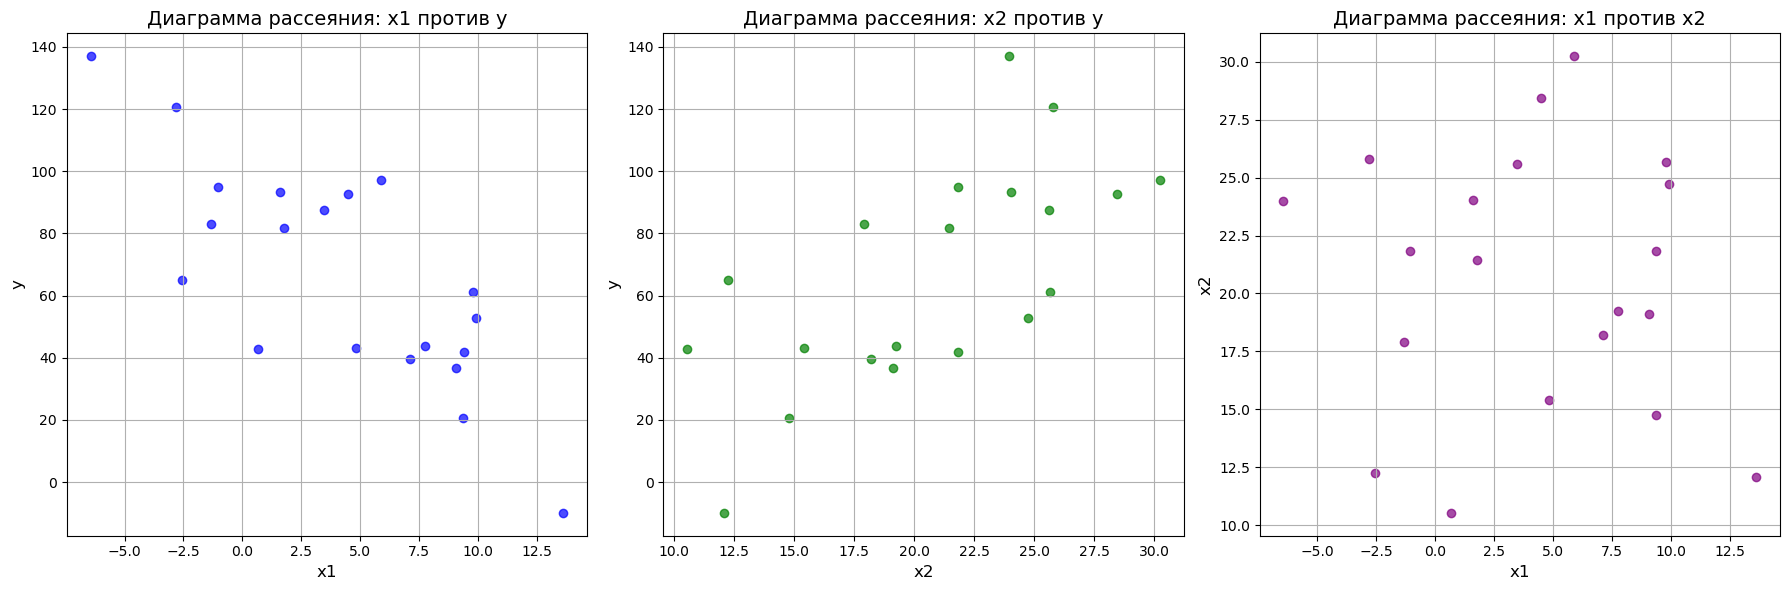

Результаты корреляционного анализа:
x1 против y: Коэффициент = -0.788, P-значение = 3.723e-05
x2 против y: Коэффициент = 0.670, P-значение = 1.234e-03
x1 против x2: Коэффициент = -0.075, P-значение = 7.533e-01

Выводы:
x1 и x2 не демонстрируют сильной корреляции (Коэффициент = -0.075). Модель множественной регрессии может быть применима.


In [24]:
# Определение имен столбцов для анализа
feature1, feature2, target = df4.columns[0], df4.columns[1], df4.columns[2]

# Создание диаграмм рассеяния
plt.figure(figsize=(18, 6))

# feature1 vs target
plt.subplot(1, 3, 1)
plt.scatter(df4[feature1], df4[target], alpha=0.7, color='blue')
plt.title(f'Диаграмма рассеяния: {feature1} против {target}', fontsize=14)
plt.xlabel(feature1, fontsize=12)
plt.ylabel(target, fontsize=12)
plt.grid(True)

# feature2 vs target
plt.subplot(1, 3, 2)
plt.scatter(df4[feature2], df4[target], alpha=0.7, color='green')
plt.title(f'Диаграмма рассеяния: {feature2} против {target}', fontsize=14)
plt.xlabel(feature2, fontsize=12)
plt.ylabel(target, fontsize=12)
plt.grid(True)

# feature1 vs feature2
plt.subplot(1, 3, 3)
plt.scatter(df4[feature1], df4[feature2], alpha=0.7, color='purple')
plt.title(f'Диаграмма рассеяния: {feature1} против {feature2}', fontsize=14)
plt.xlabel(feature1, fontsize=12)
plt.ylabel(feature2, fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

# Вычисление коэффициентов корреляции
correlation_feature1_target, p_value_feature1_target = pearsonr(df4[feature1], df4[target])
correlation_feature2_target, p_value_feature2_target = pearsonr(df4[feature2], df4[target])
correlation_feature1_feature2, p_value_feature1_feature2 = pearsonr(df4[feature1], df4[feature2])

# Печать результатов корреляционного анализа
print("Результаты корреляционного анализа:")
print(f"{feature1} против {target}: Коэффициент = {correlation_feature1_target:.3f}, P-значение = {p_value_feature1_target:.3e}")
print(f"{feature2} против {target}: Коэффициент = {correlation_feature2_target:.3f}, P-значение = {p_value_feature2_target:.3e}")
print(f"{feature1} против {feature2}: Коэффициент = {correlation_feature1_feature2:.3f}, P-значение = {p_value_feature1_feature2:.3e}")

# Оценка корректности модели множественной регрессии
print("\nВыводы:")
if abs(correlation_feature1_feature2) > 0.7:
    print(f"{feature1} и {feature2} имеют высокую корреляцию (Коэффициент = {correlation_feature1_feature2:.3f}). Возможна мультиколлинеарность. Рекомендуется исключить один из факторов.")
else:
    print(f"{feature1} и {feature2} не демонстрируют сильной корреляции (Коэффициент = {correlation_feature1_feature2:.3f}). Модель множественной регрессии может быть применима.")

In [25]:
# Стандартизация данных
scaler = StandardScaler()
X_normalized = scaler.fit_transform(df4[[feature1, feature2]])  # Нормализация независимых переменных
y_normalized = scaler.fit_transform(df4[[target]])[:, 0]  # Нормализация зависимой переменной

# Создание и обучение модели линейной регрессии
linear_model = LinearRegression()
linear_model.fit(X_normalized, y_normalized)

# Извлечение стандартных коэффициентов регрессии
beta_coefficients_standardized = linear_model.coef_

# Печать результатов
print("Стандартизированные коэффициенты регрессии (бета-коэффициенты):")
print(f"{feature1}: {beta_coefficients_standardized[0]:.3f}")
print(f"{feature2}: {beta_coefficients_standardized[1]:.3f}")

Стандартизированные коэффициенты регрессии (бета-коэффициенты):
x1: -0.742
x2: 0.614


📈 Коэффициенты 'чистой' регрессии:
Свободный член (b0): 6.722
x1: -4.917
x2: 3.893


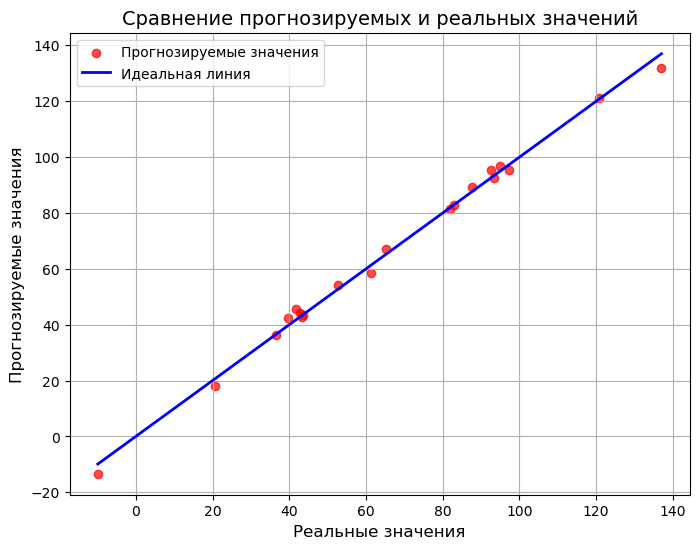

In [26]:
# Разделение данных на независимые переменные (X) и целевую переменную (y)
X_data = df4[[feature1, feature2]].values  # Независимые переменные
y_data = df4[target].values  # Целевая переменная

# Создание и обучение модели множественной регрессии
multiple_regression_model = LinearRegression()
multiple_regression_model.fit(X_data, y_data)

# Получение коэффициентов "чистой" регрессии
intercept_value = multiple_regression_model.intercept_  # Свободный член
coefficients_multiple_regression = multiple_regression_model.coef_  # Коэффициенты регрессии

# Печать коэффициентов
print("📈 Коэффициенты 'чистой' регрессии:")
print(f"Свободный член (b0): {intercept_value:.3f}")
print(f"{feature1}: {coefficients_multiple_regression[0]:.3f}")
print(f"{feature2}: {coefficients_multiple_regression[1]:.3f}")

# Прогнозирование значений y
y_predictions = multiple_regression_model.predict(X_data)
# Создание диаграммы рассеяния для сравнения прогнозных и реальных значений
plt.figure(figsize=(8, 6))
plt.scatter(y_data, y_predictions, alpha=0.7, color='red', label='Прогнозируемые значения')
plt.plot([min(y_data), max(y_data)], [min(y_data), max(y_data)], color='blue', linewidth=2, label='Идеальная линия')
plt.title('Сравнение прогнозируемых и реальных значений', fontsize=14)
plt.xlabel('Реальные значения', fontsize=12)
plt.ylabel('Прогнозируемые значения', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [27]:
# Вычисление коэффициента множественной корреляции
r_squared_value = r2_score(y, y_pred)
multiple_correlation_coefficient = r_squared_value ** 0.5  # Коэффициент множественной корреляции (R)

# Определение числа наблюдений и параметров
num_observations = len(y)  # Количество наблюдений
num_parameters = X.shape[1] + 1  # Количество параметров (включая свободный член)

# Вычисление F-статистики
f_statistic_value = (r_squared_value / (num_parameters - 1)) / ((1 - r_squared_value) / (num_observations - num_parameters))

# Определение критического значения F
alpha_level = 0.05  # Уровень значимости
f_critical_value = f.ppf(1 - alpha_level, dfn=num_parameters - 1, dfd=num_observations - num_parameters)

# Печать результатов
print("Коэффициент множественной корреляции:")
print(f"R (Коэффициент множественной корреляции): {multiple_correlation_coefficient:.3f}")
print(f"R² (Коэффициент детерминации): {r_squared_value:.3f}")

print("\nЗначение F-критерия:")
print(f"F-статистика: {f_statistic_value:.3f}")
print(f"Критическое значение F (при α = {alpha_level}): {f_critical_value:.3f}")

# Оценка статистической значимости
print("\nОценка значимости модели:")
if f_statistic_value > f_critical_value:
    print("Модель регрессии является статистически значимой.")
else:
    print("Модель регрессии не имеет статистической значимости.")

Коэффициент множественной корреляции:
R (Коэффициент множественной корреляции): 0.985
R² (Коэффициент детерминации): 0.971

Значение F-критерия:
F-статистика: 592.259
Критическое значение F (при α = 0.05): 4.414

Оценка значимости модели:
Модель регрессии является статистически значимой.


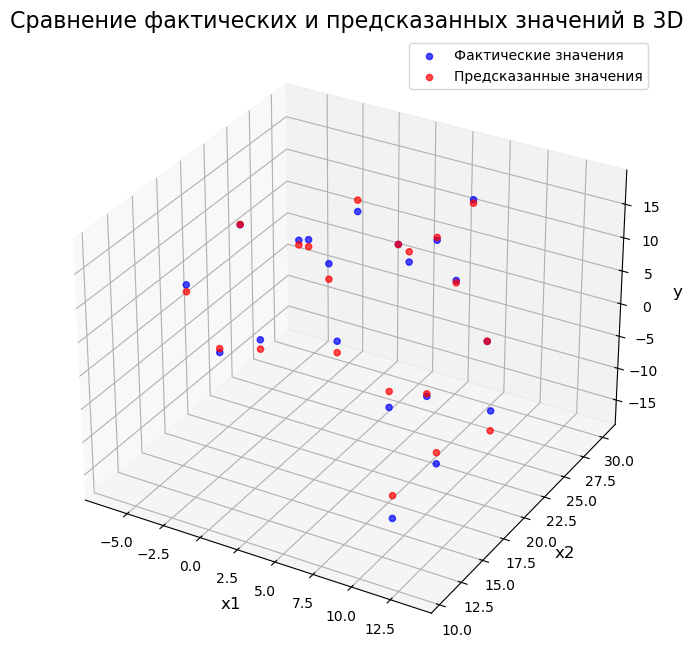

In [28]:
# Извлечение значений для графика
x1_data = df4['x1'].values  # Первый независимый признак
x2_data = df4['x2'].values  # Второй независимый признак
y_actual = y  # Фактические значения зависимой переменной
y_predictions = model.predict(X)  # Предсказанные значения

# Создание трехмерного графика
figure = plt.figure(figsize=(12, 8))
axis = figure.add_subplot(111, projection='3d')

# Отображение фактических значений
axis.scatter(x1_data, x2_data, y_actual, color='blue', label='Фактические значения', alpha=0.7)

# Отображение предсказанных значений
axis.scatter(x1_data, x2_data, y_predictions, color='red', label='Предсказанные значения', alpha=0.7)

# Настройка графика
axis.set_title('Сравнение фактических и предсказанных значений в 3D', fontsize=16)
axis.set_xlabel('x1', fontsize=12)
axis.set_ylabel('x2', fontsize=12)
axis.set_zlabel('y', fontsize=12)
axis.legend()
plt.show()